## Supervised machine learning: linear regression
In this task we are going to try to predict Employees MonthlyIncome by selecting different columns from our dataset.

### what we are going to do :
- Train, test, and validate a machine learning model for prediction of the income of a new
employee
- Apply appropriate measures for assessing the quality of the model

In [2]:
# Note: Look at 1_LoadAndClean if you want explanations

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

# Style til grafer
sns.set(style="whitegrid")

In [ ]:
# Load data 
emp_data = pd.read_csv('../Data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Clean dataset (there are no duplicates or null values, so no action needed for deleting those)
print(emp_data.isnull().sum())
print("Duplicate values: ", emp_data.duplicated().sum())

emp_data.columns

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## 2. Select and Prepare Features

We select the features we believe are most relevant for predicting an employee’s monthly income.

We also encode the categorical columns into numbers, so they can be used in machine learning models.

Note: The columns that says true or fasle is really 0 and 1, it only says true and false because panads shows it that way.

In [24]:
# %%
# Define features and target
features = [
    'Age',
    'Education',
    'EducationField',
    'JobLevel',
    'JobRole',
    'TotalWorkingYears',
    'StandardHours',
    'StockOptionLevel'
]

target = 'MonthlyIncome'

# Subset the dataset
df_model = emp_data[features + [target]].copy()

# Encode categorical variables
df_model_encoded = pd.get_dummies(df_model, columns=['EducationField', 'JobRole'], drop_first=True)

# Preview
display(df_model_encoded.sample(5))


,Age,Education,JobLevel,TotalWorkingYears,StandardHours,StockOptionLevel,MonthlyIncome,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
417,40,4,5,21,80,0,18041,True,False,False,False,False,False,False,True,False,False,False,False,False
1019,36,4,2,11,80,2,5647,False,True,False,False,False,False,False,False,False,False,False,True,False
436,33,1,1,8,80,3,3408,False,False,True,False,False,False,True,False,False,False,False,False,False
1210,33,3,1,14,80,3,2028,False,False,True,False,False,False,True,False,False,False,False,False,False
694,33,3,2,6,80,0,6949,True,False,False,False,False,False,False,False,False,False,False,False,False


## 3. Split Data into Train and Test

We now split our data into:
- `X`: inputs (features)
- `y`: output (target – monthly income)

Then we split it into:
- `X_train`, `y_train`: for training the model
- `X_test`, `y_test`: for testing the model

We use 70% for training and 30% for testing because it's a good balance between learning and testing. 


In [25]:

# Define X and y
X = df_model_encoded.drop(columns=['MonthlyIncome'])
y = df_model_encoded['MonthlyIncome']

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


### Note
we use "random_state=42" to split between training and test data that makes sure it done the same way everything it's run. 

42 is just a common choice that many developers use for fun. 

## 4. Train the Linear Regression Model

We train a linear regression model using our "training" data.

Then we use the model to predict monthly income for the "test" data.

In [27]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict income for test data
y_pred = model.predict(X_test)

## 5. Show Sample Predictions

Just for fun, we print the first 10 real vs. predicted salaries.
This helps us understand how close the model's predictions are.

In [28]:
# Show 10 predicted vs. actual
for real, pred in list(zip(y_test, y_pred))[:10]:
    print(f"Faktisk løn: {real:.0f} kr.  →  Forudsagt løn: {pred:.0f} kr.")


Faktisk løn: 8463 kr.  →  Forudsagt løn: 5876 kr.
Faktisk løn: 4450 kr.  →  Forudsagt løn: 5786 kr.
Faktisk løn: 1555 kr.  →  Forudsagt løn: 2811 kr.
Faktisk løn: 9724 kr.  →  Forudsagt løn: 8949 kr.
Faktisk løn: 5914 kr.  →  Forudsagt løn: 5614 kr.
Faktisk løn: 2579 kr.  →  Forudsagt løn: 2480 kr.
Faktisk løn: 4230 kr.  →  Forudsagt løn: 2409 kr.
Faktisk løn: 2232 kr.  →  Forudsagt løn: 2508 kr.
Faktisk løn: 8865 kr.  →  Forudsagt løn: 9315 kr.
Faktisk løn: 2269 kr.  →  Forudsagt løn: 2232 kr.


## 6. Evaluate the Model – R² and RMSE

We evaluate the model using two metrics:

- **R² (R-squared)**: How much of the variation in salary the model can explain  
- **RMSE**: How much the model is off on average in kroner

In [29]:

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² score: {r2:.3f}")
print(f"RMSE: {rmse:.2f} kr.")


R² score: 0.934
RMSE: 1153.72 kr.


## 7. Visualize Predicted vs. Actual Salaries

We use a scatter plot to compare the predicted values to the real values.

If the model is perfect, all dots should be close to the red diagonal line (where prediction = reality).


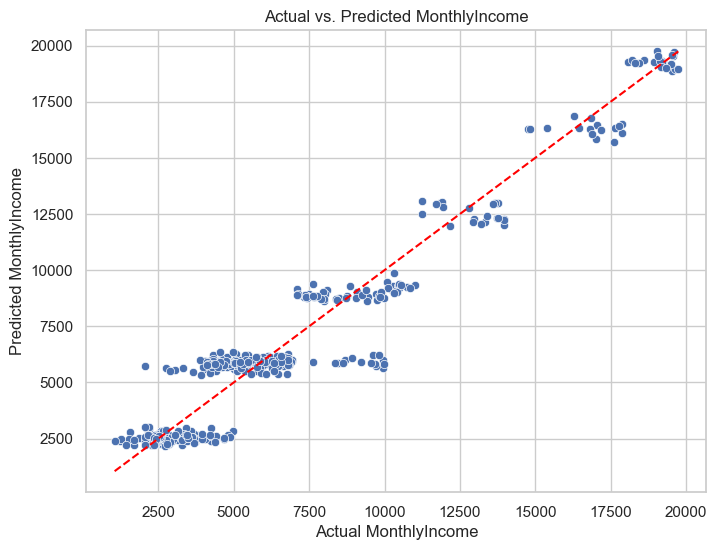

In [30]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual MonthlyIncome")
plt.ylabel("Predicted MonthlyIncome")
plt.title("Actual vs. Predicted MonthlyIncome")
plt.show()


## 8. Visualize Prediction Errors (Residuals)

Residual = Actual - Predicted aka Residual is error. 

A residual plot shows how far off the model is on each prediction.
We want most dots to be close to zero (small error).

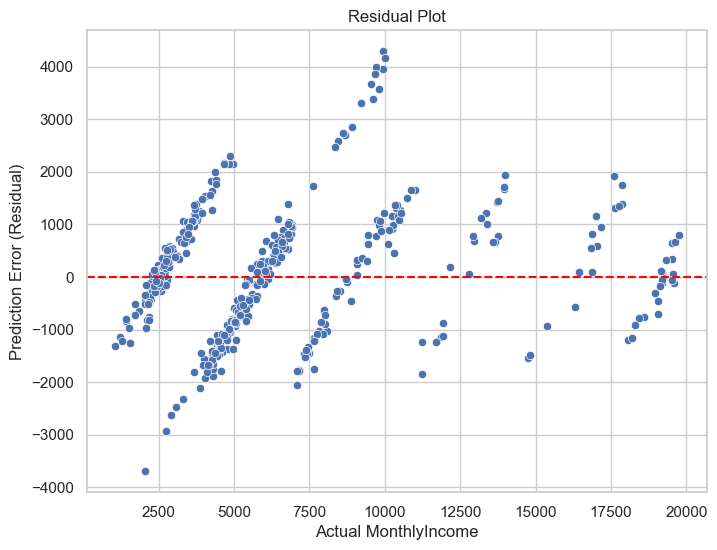

In [31]:

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual MonthlyIncome")
plt.ylabel("Prediction Error (Residual)")
plt.title("Residual Plot")
plt.show()
